We will use the daily spreadsheet from EU CDC containing new cases and deaths per country per day.

In [21]:
#!rm COVID-19-geographic-disbtribution-worldwide.xlsx
!wget -N https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide.xlsx

--2020-05-29 11:37:37--  https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide.xlsx
Resolving www.ecdc.europa.eu (www.ecdc.europa.eu)... 2600:9000:21c7:5a00:1d:d83a:40c0:93a1, 2600:9000:21c7:ea00:1d:d83a:40c0:93a1, 2600:9000:21c7:c400:1d:d83a:40c0:93a1, ...
Connecting to www.ecdc.europa.eu (www.ecdc.europa.eu)|2600:9000:21c7:5a00:1d:d83a:40c0:93a1|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 938764 (917K) [application/vnd.openxmlformats-officedocument.spreadsheetml.sheet]
Saving to: ‘COVID-19-geographic-disbtribution-worldwide.xlsx’

COVID-19-geographic 100%[===================>] 916.76K  2.39MB/s    in 0.4s    

2020-05-29 11:37:37 (2.39 MB/s) - ‘COVID-19-geographic-disbtribution-worldwide.xlsx’ saved [938764/938764]



Get Pandas and NumPy for feature engineering and calculations and get plots inline.

In [22]:
import pandas as pd
import numpy  as np

%matplotlib inline

We read our dataframe directly from the downloaded Excel file and have a look at the first 10 lines for format. Data for Namibia caused missing values because the `geoId` is __NA__, so we disable interpretation of missing values.

In [23]:
df = pd.read_excel('COVID-19-geographic-disbtribution-worldwide.xlsx', keep_default_na=False, na_values='')
df.head(10)

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continentExp
0,2020-05-29,29,5,2020,580,8,Afghanistan,AF,AFG,37172386.0,Asia
1,2020-05-28,28,5,2020,625,7,Afghanistan,AF,AFG,37172386.0,Asia
2,2020-05-27,27,5,2020,658,1,Afghanistan,AF,AFG,37172386.0,Asia
3,2020-05-26,26,5,2020,591,1,Afghanistan,AF,AFG,37172386.0,Asia
4,2020-05-25,25,5,2020,584,2,Afghanistan,AF,AFG,37172386.0,Asia
5,2020-05-24,24,5,2020,782,11,Afghanistan,AF,AFG,37172386.0,Asia
6,2020-05-23,23,5,2020,540,12,Afghanistan,AF,AFG,37172386.0,Asia
7,2020-05-22,22,5,2020,531,6,Afghanistan,AF,AFG,37172386.0,Asia
8,2020-05-21,21,5,2020,492,9,Afghanistan,AF,AFG,37172386.0,Asia
9,2020-05-20,20,5,2020,581,5,Afghanistan,AF,AFG,37172386.0,Asia


Last check of our source dataframe.

In [24]:
df.count()

dateRep                    20084
day                        20084
month                      20084
year                       20084
cases                      20084
deaths                     20084
countriesAndTerritories    20084
geoId                      20084
countryterritoryCode       19872
popData2018                19803
continentExp               20084
dtype: int64

We pivot to a country by column format.

In [25]:
df_geo = df.pivot(index='dateRep', columns='geoId', values=['cases', 'deaths'])
df_geo

cases                                                         ...  \
geoId         AD     AE     AF   AG   AI    AL     AM   AO     AR    AT  ...   
dateRep                                                                  ...   
2019-12-31   NaN    0.0    0.0  NaN  NaN   NaN    0.0  NaN    NaN   0.0  ...   
2020-01-01   NaN    0.0    0.0  NaN  NaN   NaN    0.0  NaN    NaN   0.0  ...   
2020-01-02   NaN    0.0    0.0  NaN  NaN   NaN    0.0  NaN    NaN   0.0  ...   
2020-01-03   NaN    0.0    0.0  NaN  NaN   NaN    0.0  NaN    NaN   0.0  ...   
2020-01-04   NaN    0.0    0.0  NaN  NaN   NaN    0.0  NaN    NaN   0.0  ...   
...          ...    ...    ...  ...  ...   ...    ...  ...    ...   ...  ...   
2020-05-25   1.0  781.0  584.0  0.0  0.0   9.0  359.0  9.0  723.0  32.0  ...   
2020-05-26   0.0  822.0  591.0  0.0  0.0   6.0  452.0  0.0  552.0  20.0  ...   
2020-05-27   0.0  779.0  658.0  0.0  0.0  25.0  289.0  2.0  600.0  38.0  ...   
2020-05-28   0.0  883.0  625.0  0.0  0.0  21.0  372.0  0.0  705.0  18.0  ...   
2020-05-29   0.0  563.0  580.0  0.0  0.0  26.0  442.0  2.0  769.0  28.0  ...   

           deaths                                                
geoId          VC   VE   VG   VI   VN   XK   YE    ZA   ZM   ZW  
dateRep                                                          
2019-12-31    NaN  NaN  NaN  NaN  0.0  NaN  NaN   NaN  NaN  NaN  
2020-01-01    NaN  NaN  NaN  NaN  0.0  NaN  NaN   NaN  NaN  NaN  
2020-01-02    NaN  NaN  NaN  NaN  0.0  NaN  NaN   NaN  NaN  NaN  
2020-01-03    NaN  NaN  NaN  NaN  0.0  NaN  NaN   NaN  NaN  NaN  
2020-01-04    NaN  NaN  NaN  NaN  0.0  NaN  NaN   NaN  NaN  NaN  
...           ...  ...  ...  ...  ...  ...  ...   ...  ...  ...  
2020-05-25    0.0  0.0  0.0  0.0  0.0  0.0  3.0  22.0  0.0  0.0  
2020-05-26    0.0  0.0  0.0  0.0  0.0  1.0  3.0  52.0  0.0  0.0  
2020-05-27    0.0  1.0  0.0  0.0  0.0  0.0  4.0  43.0  0.0  0.0  
2020-05-28    0.0  0.0  0.0  0.0  0.0  0.0  4.0  28.0  0.0  0.0  
2020-05-29    0.0  0.0  0.0  0.0  0.0  0.0  4.0  25.0  0.0  0.0  

[151 rows x 420 columns]

For predictions later on we need extra rows in our dataframe. One of the ways to do that is reindexing with a larger range, so we use the current range and add three months and check our latest date.

In [26]:
new_index = pd.date_range(df_geo.index.min(), df_geo.index.min() + pd.Timedelta('365 days'))
df_geo = df_geo.reindex(new_index)
df_geo

cases                                          ... deaths          \
geoId         AD   AE   AF  AG  AI  AL   AM  AO  AR   AT  ...     VC  VE  VG   
2019-12-31   NaN  0.0  0.0 NaN NaN NaN  0.0 NaN NaN  0.0  ...    NaN NaN NaN   
2020-01-01   NaN  0.0  0.0 NaN NaN NaN  0.0 NaN NaN  0.0  ...    NaN NaN NaN   
2020-01-02   NaN  0.0  0.0 NaN NaN NaN  0.0 NaN NaN  0.0  ...    NaN NaN NaN   
2020-01-03   NaN  0.0  0.0 NaN NaN NaN  0.0 NaN NaN  0.0  ...    NaN NaN NaN   
2020-01-04   NaN  0.0  0.0 NaN NaN NaN  0.0 NaN NaN  0.0  ...    NaN NaN NaN   
...          ...  ...  ...  ..  ..  ..  ...  ..  ..  ...  ...    ...  ..  ..   
2020-12-26   NaN  NaN  NaN NaN NaN NaN  NaN NaN NaN  NaN  ...    NaN NaN NaN   
2020-12-27   NaN  NaN  NaN NaN NaN NaN  NaN NaN NaN  NaN  ...    NaN NaN NaN   
2020-12-28   NaN  NaN  NaN NaN NaN NaN  NaN NaN NaN  NaN  ...    NaN NaN NaN   
2020-12-29   NaN  NaN  NaN NaN NaN NaN  NaN NaN NaN  NaN  ...    NaN NaN NaN   
2020-12-30   NaN  NaN  NaN NaN NaN NaN  NaN NaN NaN  NaN  ...    NaN NaN NaN   

                                         
geoId       VI   VN  XK  YE  ZA  ZM  ZW  
2019-12-31 NaN  0.0 NaN NaN NaN NaN NaN  
2020-01-01 NaN  0.0 NaN NaN NaN NaN NaN  
2020-01-02 NaN  0.0 NaN NaN NaN NaN NaN  
2020-01-03 NaN  0.0 NaN NaN NaN NaN NaN  
2020-01-04 NaN  0.0 NaN NaN NaN NaN NaN  
...         ..  ...  ..  ..  ..  ..  ..  
2020-12-26 NaN  NaN NaN NaN NaN NaN NaN  
2020-12-27 NaN  NaN NaN NaN NaN NaN NaN  
2020-12-28 NaN  NaN NaN NaN NaN NaN NaN  
2020-12-29 NaN  NaN NaN NaN NaN NaN NaN  
2020-12-30 NaN  NaN NaN NaN NaN NaN NaN  

[366 rows x 420 columns]

Most algorithms take numerical data as inputs for a model, so we add a column representing the date as days since January 1st, 2019. To access the date values in the index easily, we first create a separate column.

In [27]:
df_geo['daynum'] = (df_geo.index - df_geo.index.min()).days
df_geo['daynum'].describe()

count    366.000000
mean     182.500000
std      105.799338
min        0.000000
25%       91.250000
50%      182.500000
75%      273.750000
max      365.000000
Name: daynum, dtype: float64

Now for some modeling! The _curve_ can also be interpreted as a smoothed version of the new arriving cases, because using the sum over the last 14 days is just the mean times 14. It was first assumed to have the general shape of a Gaussian curve, based on the underlying probability distribution of the disease spread. Gaussian curves have the nice property that the logarithm is a parabola, as we can check for a couple of countries.

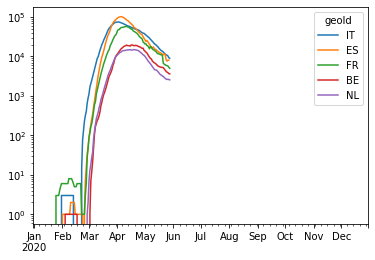

In [8]:
df_geo['cases'][['IT', 'ES', 'FR', 'BE', 'NL']].rolling(14).sum().plot(logy=True)

Let's start with __NL__. We create a simple dataframe to contain the source values for our fitting algorithm,  with a rolling week window to smooth out the target because of the reporting cycle where many of the cases over the weekend end up in the reported data for Tuesdays and Wednesdays. To ignore the noise of early cases before the outbreak we select only those days where the number is above 17 (one in a million for __NL__) and take the logarithm.

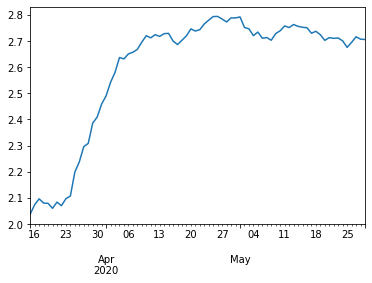

In [35]:
country  = 'SE'
measure  = 'cases'
pmeasure = 'pcases'

df_pred = pd.DataFrame({'x':df_geo['daynum'], 'y':df_geo[measure][country].rolling(7).mean()})
df_pred = df_pred[df_pred['y'] > 100]
df_pred['y'] = np.log10(df_pred['y'])
df_pred['y'].plot()

Assuming our input is now a parabola, the first derivative should be a line. We can check that with a `gradient` function.

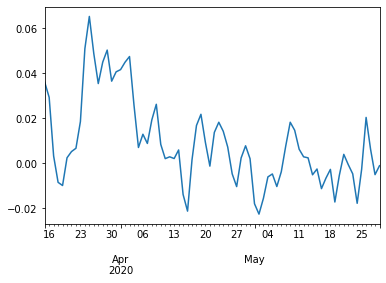

In [36]:
df_pred['g'] = np.gradient(df_pred['y'])
df_pred['g'].plot()

With `polyfit` we check if we can fit a line.

SE factors [-0.00048697  0.06380699] residuals 0.01982786872820333


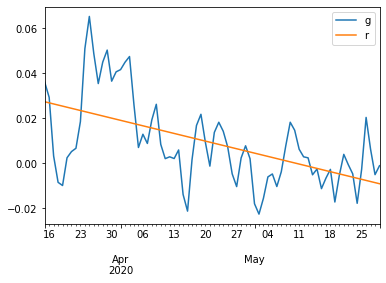

In [37]:
fit = np.polyfit(x=df_pred['x'], y=df_pred['g'], deg=1, full=True)
print(country, "factors", fit[0], "residuals", fit[1][0])

df_pred['r'] = np.polyval(fit[0], df_pred['x'])
df_pred[['g', 'r']].plot()

-0.00048697210190024514 0.06380699434335062 -0.5516500698075556 2.405320708548735e-07 8.559137243282762e-05


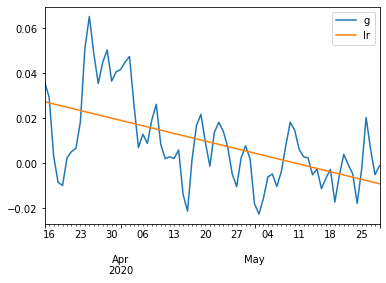

In [38]:
from scipy.stats import linregress

slope, intercept, r_value, p_value, std_err = linregress(df_pred[['x', 'g']])
print(slope, intercept, r_value, p_value, std_err)
df_pred['lr'] = slope * df_pred['x'] + intercept
df_pred[['g', 'lr']].plot()

Now we can use polynomial regression to estimate the curve with `polyfit`. We are looking for a parabola, so we use a second order approximation. The outputs are factors a, b, and c for the function `ax^2 + bx + c`. The `polyfit` function cannot handle missing values, but they are already filtered out in the selection for `y` above.

SE factors [-3.27457334e-04  8.19266137e-02 -2.31802391e+00] residuals 0.29101282266679107


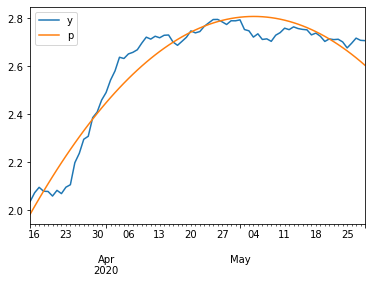

In [39]:
fit = np.polyfit(x=df_pred['x'], y=df_pred['y'], deg=2, full=True)
print(country, "factors", fit[0], "residuals", fit[1][0])

df_pred['p'] = np.polyval(fit[0], df_pred['x'])
df_pred[['y', 'p']].plot()

The `polyval` function takes the results of `polyfit` factors and applies them to input data. Once we have the resulting values, we take the exponential to find the estimated curve.

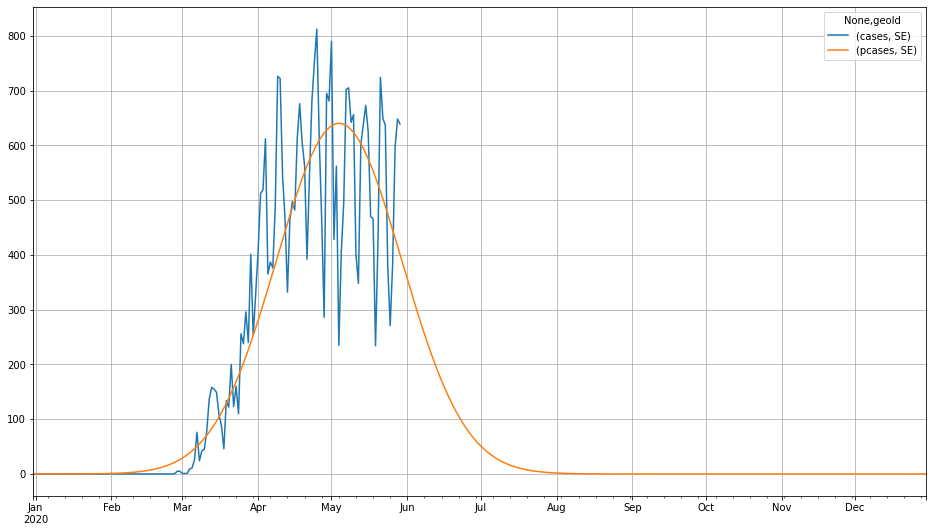

In [40]:
df_geo[(pmeasure, country)] = 10 ** np.polyval(fit[0], df_geo['daynum'])
df_geo[[(measure, country), (pmeasure, country)]].plot(figsize=(16, 9), grid=True)

Now that we have a curve fitted, we can see where the cumulative number will end up if none of our assumptions change (which is rarely the case).

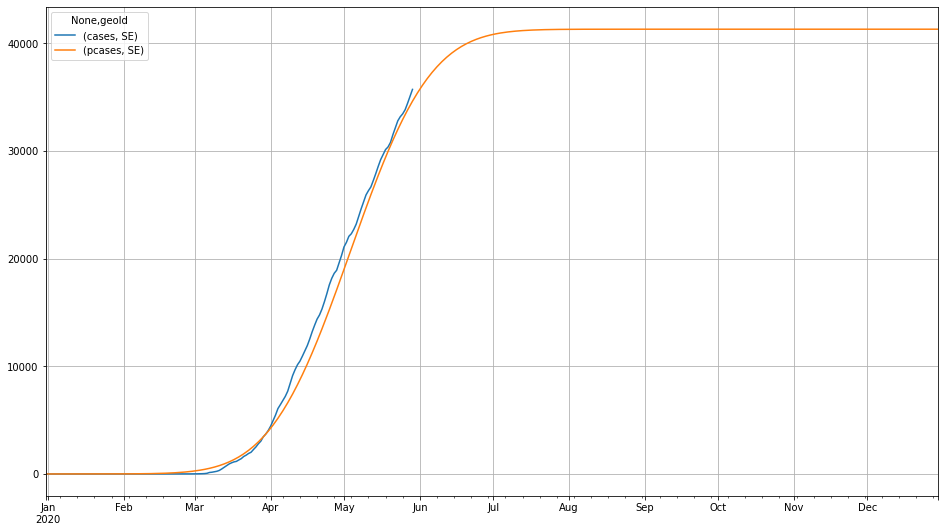

In [41]:
df_geo[[(measure, country), (pmeasure, country)]].cumsum().plot(figsize=(16, 9), grid=True)

In [43]:
df_geo[pmeasure][country].cumsum().tail(1).astype(int)

2020-12-30    44613
Freq: D, Name: NL, dtype: int64

Keep exploring! Stay home, wash your hands, keep your distance.